# Optimisation Model Results

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# CSV Files -> dataframes
results_build = pd.read_csv("results_build.csv")
results_capacity = pd.read_csv("results_capacity.csv")
results_conv_flows = pd.read_csv("results_conversion_flows.csv")
results_ann_gen = pd.read_csv("results_generation_annual.csv")
results_hour_gen = pd.read_csv("results_generation_hourly.csv")
results_retire = pd.read_csv("results_retire.csv")
results_unserved_hourly = pd.read_csv("results_unserved_hourly.csv")

In [ ]:
results_capacity

In [ ]:
results_conv_flows

In [13]:
results_df = results_capacity.copy()
results_df["Build MW"] = results_build["build_MW"]
results_df["Retire MW"] = results_retire["retire_MW"]
results_df.head()

,tech,year,cap_MW,Build MW,Retire MW
0,coal,0,4000.0,0.000000,0.0
1,gas,0,2000.0,0.000000,0.0
2,solar,0,800.0,2953.099087,0.0
3,wind,0,1200.0,2064.710155,0.0
4,biomass,0,1000.0,0.000000,0.0


In [31]:
results_piv = results_df.groupby("year").sum("cap_MW")
conv_piv = results_conv_flows.groupby("year").sum("conv_start_MW")
conv_piv 

,conv_start_MW
year,
0,0.000000
1,1515.020391
2,0.000000
3,1072.806266
4,0.000000
5,538.401723
6,0.000000
7,0.000000
8,0.000000


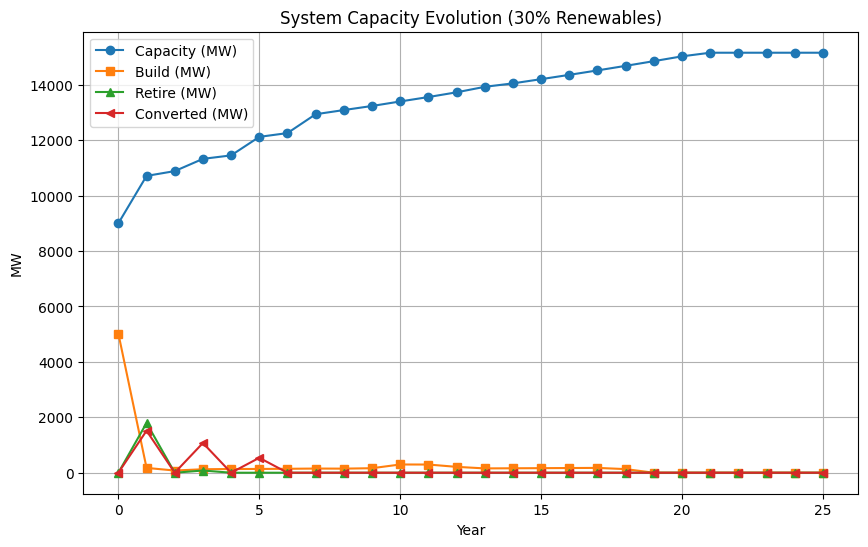

In [34]:
plt.figure(figsize=(10,6))
plt.plot(results_piv.index, results_piv["cap_MW"], marker = "o", label= "Capacity (MW)")
plt.plot(results_piv.index, results_piv["Build MW"], marker = "s", label = "Build (MW)")
plt.plot(results_piv.index, results_piv["Retire MW"], marker="^", label = "Retire (MW)")
plt.plot(conv_piv.index, conv_piv["conv_start_MW"], marker="<", label = "Converted (MW)")

plt.xlabel("Year")
plt.ylabel("MW")
plt.title("System Capacity Evolution (30% Renewables)")
plt.legend()
plt.grid(True)
plt.show()